***ANALYSE DES DONNEES ACTIVITE EMPLOI ET CHOMAGE - ENQUETE EMPLOI EN CONTINU***  \
Source : https://www.data.gouv.fr/fr/datasets/activite-emploi-et-chomage-enquete-emploi-en-continu/

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

from simpledbf import Dbf5

In [98]:
#Importation des fichiers de données
eec23 = pd.read_csv('FD_csv_EEC23/FD_csv_EEC23.csv', delimiter=';')
eec22_dbf = Dbf5('FD_EEC_2022_dbase/FD_EEC_2022.dbf')
eec22 = eec22_dbf.to_dataframe()

In [99]:
#Importation des fichiers descriptifs des modalités des variables
varmod_eec23 = pd.read_csv('FD_csv_EEC23/Varmod_EEC_2023.csv', delimiter=';')
varmod_eec22_dbf = Dbf5('FD_EEC_2022_dbase/varmod_EEC_2022.dbf')
varmod_eec22 = varmod_eec22_dbf.to_dataframe()

**ANALYSE DES DONNEES ACTIVITE EMPLOI ET CHOMAGE - EEC DE 2023**

In [100]:
# Affichage des différentes variables(columns) de la base de données 
eec23.columns

Index(['AAC', 'ACL_EMPLOI', 'ACTEU', 'AGE6', 'AISCO2', 'ANCCHOM', 'ANCEMPL4',
       'ANCSSEMP', 'ANNEE', 'APCS1', 'APCS2', 'CHAMP_M_15_89', 'CHPUB',
       'COUPL_LOG', 'DEMNE', 'DIP7', 'DISPONE', 'DISPPLC', 'ENFRED', 'ESEG_1',
       'ESEG_2', 'EXTRIAN', 'HALOR', 'HEFFEMP', 'HEFFTOT', 'HHABEMP',
       'HHABTOT', 'IDENT', 'ISCO2', 'METRODOM', 'MRANE', 'MRBNE', 'MRCNE',
       'MRDNE', 'MRENE', 'MRFNE', 'MRGNE', 'MRHNE', 'MRINE', 'MRJNE',
       'NAFANTG004N', 'NAFANTG088N', 'NAFG004UN', 'NAFG010UN', 'NAFG017UN',
       'NAFG021UN', 'NAFG038UN', 'NAFG088UN', 'NATIO', 'NOI', 'OFFICC',
       'PASTRA', 'PASTRB', 'PCS1Q', 'PCSL', 'PCSP', 'PUB3FP', 'RABS',
       'RAISDISPPLC', 'RAISNDISPONE', 'RAISNRECNE', 'RAISNSOUNE', 'RAISTP',
       'RECNE', 'SALTYP', 'SEXE', 'SO', 'SOU_C', 'SOUSEMPL', 'SOUSEMPLR',
       'STATUT', 'STATUTDET', 'STAT_CS', 'STAT_CSPRL', 'STC', 'STCOMM2020',
       'STPLC', 'TEMP', 'TPPRED', 'TRAREF', 'TRIM', 'TXTPPRED', 'TYPLOG5'],
      dtype='object')

La description des codes des variables se trouve dans le fichier "varmod_EEC_2023". C'est également le cas pour la base de données de 2022.

In [101]:
#Vérification des données manquantes
missing_values = eec23.isnull().sum()
print(missing_values[missing_values > 0])

AAC           173184
ACL_EMPLOI     40045
AISCO2        166930
ANCCHOM       334803
ANCEMPL4      181694
               ...  
STPLC         181694
TEMP          305550
TPPRED        181694
TRAREF         46282
TXTPPRED      318697
Length: 64, dtype: int64


La base de données comporte plusieurs valeurs manquantes. Il est important de comprendre la signification de ces valeurs avant d'utiliser les variables concernées. Je m'assurerai de le faire progressivement.

**ANALYSE EXPLOIRATOIRE DES DONNEES**

ANALYSE DES DONNEES **Statut d'activité [ACTEU]**

In [102]:
print(missing_values.loc['ACTEU'])

0


In [103]:
counts_acteu = eec23['ACTEU'].value_counts()
percentages_acteu = (counts_acteu / len(eec23)) * 100
print(percentages_acteu)

ACTEU
3    48.153024
1    47.882532
2     3.964443
Name: count, dtype: float64


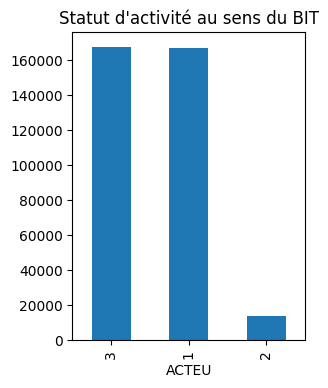

In [104]:
plt.figure(figsize=(3,4))
eec23['ACTEU'].value_counts().plot(kind='bar')
plt.title("Statut d'activité au sens du BIT")
plt.show()

Statut d'activité au sens du Bureau International du Travail (BIT) :  \
1 -> Emploi  \
2 -> Chômage  \
3 -> Inactivité  

On observe qu'il y a presque autant de personnes occupées(ou en emploi) qu'il y a de personnes inactives. Le taux de chômage est quand à lui relativement faible et d'environ 4%

ANALYSE DES DONNEES CLASSE D'EMPLOI (emploi actuel ou dernier emploi) **[ACL_EMPLOI]**

Extraction des codes et libellés des données classe d'emploi.

In [105]:
acl_emploi_varmod = varmod_eec23[varmod_eec23['COD_VAR'] == 'ACL_EMPLOI']
acl_emploi_varmod = acl_emploi_varmod.drop(columns=['TYPE_VAR', 'LONG_VAR'])

In [106]:
acl_emploi_varmod.head()

,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD
4,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),I1,Emploi indépendant de niveau supérieur
5,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),I2,Emploi indépendant de niveau intermédiaire
6,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),I3,"Emploi de petit indépendant, avec salarié ou a..."
7,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),I4,"Emploi de petit indépendant, sans salarié ou a..."
8,ACL_EMPLOI,Classe d'emploi (emploi actuel ou dernier emploi),A1,"Emploi salarié de niveau supérieur, d'orientat..."


Création d'un dictionnaire permettant de faire correspondre les codes aux descriptions adéquates.

In [107]:
print(missing_values.loc['ACL_EMPLOI'])

40045


Il est nécessaire d'éliminer les valeurs manquantes de la variable ACL_EMPLOI avant de poursuivre l'analyse.

In [108]:
#Suppression valeurs manquantes
acl_emploi_desc = acl_emploi_varmod.dropna(subset=['COD_MOD', 'LIB_MOD'])

#Création d'un dictionnaire contenant les codes des modalités et leurs descriptions
acl_emploi_dict = dict(zip(acl_emploi_desc['COD_MOD'], acl_emploi_desc['LIB_MOD']))

print(acl_emploi_dict)

{'I1': 'Emploi indépendant de niveau supérieur', 'I2': 'Emploi indépendant de niveau intermédiaire', 'I3': 'Emploi de petit indépendant, avec salarié ou aide familiale', 'I4': 'Emploi de petit indépendant, sans salarié ou aide familiale', 'A1': "Emploi salarié de niveau supérieur, d'orientation technique, en CDI", 'A2': "Emploi salarié de niveau supérieur, d'orientation tertiaire, en CDI", 'A3': 'Emploi salarié de niveau supérieur, fonctionnaire', 'A4': 'Emploi salarié de niveau supérieur, en contrat à durée limitée', 'B1': "Emploi salarié de niveau intermédiaire, d'orientation technique, en CDI", 'B2': "Emploi salarié de niveau intermédiaire, d'orientation tertiaire, en CDI", 'B3': 'Emploi salarié de niveau intermédiaire, fonctionnaire', 'B4': 'Emploi salarié de niveau intermédiaire, en contrat à durée limitée', 'C1': "Emploi salarié qualifié, d'orientation ouvrière, en CDI", 'C2': "Emploi salarié qualifié, d'orientation employée, en CDI", 'C3': 'Emploi salarié qualifié, fonctionnaire

Préparation des données pour visualition

In [109]:
# Création d'un dataframe vide
eec23_acl_emploi = pd.DataFrame()

# Création d'une colonne ID contenant les données codées des modalités
eec23_acl_emploi['code_mod'] = eec23['ACL_EMPLOI']
print(eec23_acl_emploi)

       code_mod
0            C2
1            C1
2            D1
3            B3
4            D1
...         ...
348619       C4
348620       C3
348621       D4
348622       D4
348623       B1

[348624 rows x 1 columns]


In [110]:
# Ajout de la colonne mod_lib en faisant correspondre les codes(code_mod) à leurs descriptions respectives
eec23_acl_emploi['mod_lib'] = eec23_acl_emploi['code_mod'].map(acl_emploi_dict)

print(eec23_acl_emploi)

       code_mod                                            mod_lib
0            C2  Emploi salarié qualifié, d'orientation employé...
1            C1  Emploi salarié qualifié, d'orientation ouvrièr...
2            D1  Emploi salarié peu qualifié, d'orientation ouv...
3            B3  Emploi salarié de niveau intermédiaire, foncti...
4            D1  Emploi salarié peu qualifié, d'orientation ouv...
...         ...                                                ...
348619       C4  Emploi salarié qualifié, en contrat à durée li...
348620       C3             Emploi salarié qualifié, fonctionnaire
348621       D4  Emploi salarié peu qualifié, en contrat à duré...
348622       D4  Emploi salarié peu qualifié, en contrat à duré...
348623       B1  Emploi salarié de niveau intermédiaire, d'orie...

[348624 rows x 2 columns]


Calcul de la proportion des différentes classes d'emploi en pourcentage

In [111]:
counts_aclemploi = eec23['ACL_EMPLOI'].value_counts()
percentages_aclemploi = (counts_aclemploi / len(eec23)) * 100
print(percentages_aclemploi)

ACL_EMPLOI
D4    9.499346
C1    7.699699
B2    6.692884
C2    6.539997
A2    5.953979
A3    5.468929
C4    4.802595
D1    4.692735
C3    4.360285
B1    4.118477
A1    4.059675
B3    3.995996
D2    3.908509
I4    3.405101
I3    2.879607
I2    2.277812
I1    2.175123
B4    2.141275
D3    1.812268
A4    1.320907
99    0.708213
Name: count, dtype: float64


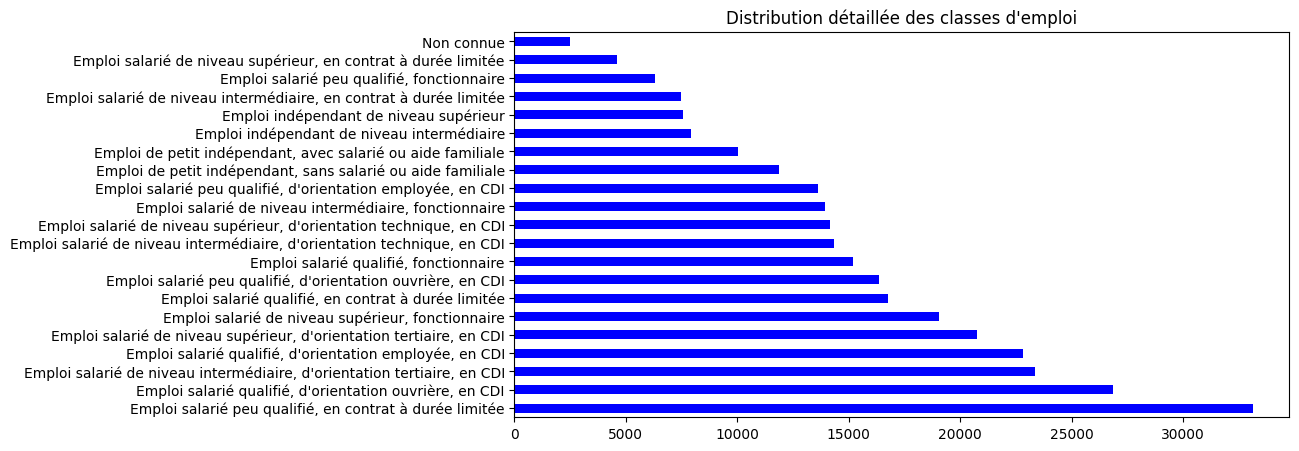

In [112]:
#Création d'un diagramme à barres

plt.figure(figsize=(10, 5))
eec23_acl_emploi['mod_lib'].value_counts().plot(kind='barh', color='b')

plt.xlabel("")
plt.ylabel("")
plt.title("Distribution détaillée des classes d'emploi")

plt.show()

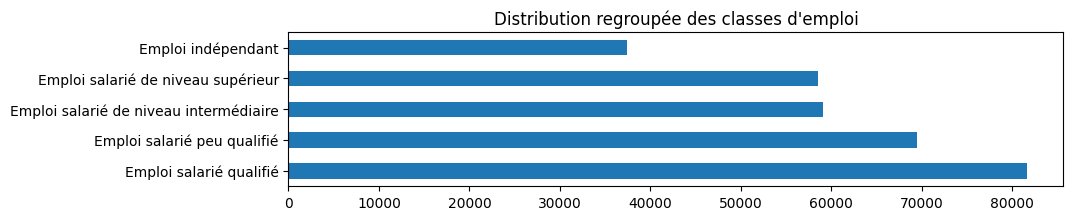

In [113]:
# Extraction du premier charactère de codes des modalités afin de les regrouper en classes
eec23_acl_emploi['code_mod_category'] = eec23_acl_emploi['code_mod'].apply(lambda x: x[0] if pd.notnull(x) else x)

# Définition d'un dictionnaire de classes
labels = {
    'A': 'Emploi salarié de niveau supérieur',
    'B': 'Emploi salarié de niveau intermédiaire',
    'C': 'Emploi salarié qualifié',
    'D': 'Emploi salarié peu qualifié',
    'I': 'Emploi indépendant'
}

# Correspondance
eec23_acl_emploi['classes'] = eec23_acl_emploi['code_mod_category'].map(labels)

# Visualisation
plt.figure(figsize=(10,2))
eec23_acl_emploi['classes'].value_counts().plot(kind='barh')
plt.xlabel("")
plt.ylabel("")
plt.title("Distribution regroupée des classes d'emploi")
plt.show()

On observe que les emplois salariés peu qualifiés en CDD constituent la classe d'emploi la plus recrutée, représentant 9% du total. Cela inclut probablement de la main-d'œuvre ponctuelle et possiblement des emplois secondaires. Une analyse plus approfondie, notamment en examinant le nombre d'heures travaillées, pourrait être intéressante. Les emplois salariés peu qualifiés en CDD pourraient représenter un grand nombre de contrats, mais un faible nombre d'heures travaillées.

En regroupant les données, on constate que les emplois salariés qualifiés dominent le marché du travail, suivis par les emplois salariés peu qualifiés. Les emplois salariés de niveau intermédiaire et les emplois salariés de niveau supérieur sont relativement au même niveau.

Les emplois indépendants, quant à eux, recrutent beaucoup moins et représentent environ 11% du total.
